# **Teaching a taxi to pick up and drop passengers using Reinforcement Learning**


In [2]:
import gym # Install OpenAI Gym 
import numpy as np 
import pickle, os 

In [3]:
env = gym.make("Taxi-v3", render_mode="rgb_array") #Creating the Environment 
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<TaxiEnv<Taxi-v3>>>>>

In [46]:
state = env.reset() #Resetting the State of the Taxi
state


(286, {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)})

In [5]:
env.observation_space.n #Number of States in the Taxi-Environment

500

## POSSIBLE STATES
Taxi Location: Row(values from 0 to 4),Column(values from 0 to 4)

Passenger Location,There are five possible states:

0: Red (R), 
1: Green (G),
2: Yellow (Y), 
3: Blue (B), 
4: Inside the taxi,Pick up a passenger at the taxi's current location, provided there is a passenger there, 
5: Drop Off: Drop off the passenger at the taxi's current location, provided the passenger's destination matches the current location




In [6]:
n_actions = env.action_space.n #Number of Actions in the Environment
print(n_actions)
n_states = env.observation_space.n #Number of States in the Environment
n_states

6


500

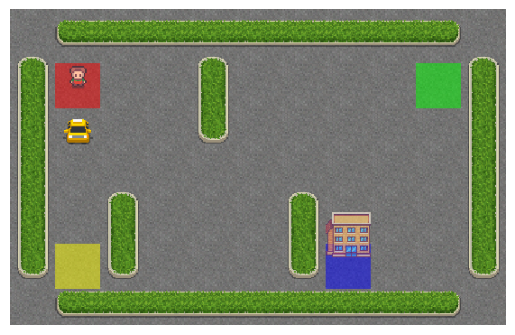

In [7]:
import matplotlib.pyplot as plt #For the Visualization of the TaxiEnvironment
# Manually set the state (taxi_row, taxi_col, passenger_location, destination)
#state = env.encode(3, 0, 3, 4) # (taxi_row, taxi_col, passenger_location, destination)
#env.s = state
frame = env.render()
plt.imshow(frame)
plt.axis('off')  # Hide the axes for a cleaner output
plt.show()

# Actions 
Action 0 (North), 
Action 1 (South), 
Action 2 (East), 
Action 3 (West), 
Action 4 (Pick Up), 
Action 5 (Drop Off) 

In [9]:
env.step(1) 

(3,
 -1,
 False,
 False,
 {'prob': 1.0, 'action_mask': array([1, 0, 1, 0, 1, 0], dtype=int8)})

In [13]:
state = env.reset()
counter = 0
g = 0
reward = None #boolean value

In [17]:
while reward != 20:
    state, reward, done, info, truncated = env.step(env.action_space.sample())  
    counter += 1 #tracks steps
    g += reward  #tracks rewards
    

In [18]:
print("number of steps {} and total reward {}".format(counter, g))

number of steps 2342 and total reward -8684


The total reward is very low and also the number of steps are very high,  while performing the process randomly.
# Q Learning

In [87]:
alpha = 0.618 #Learning Rate
gamma = 0.8 #Discount Factor
epsilon = 0.1 #Exploration Rate
episode = 0
Total_rewards = []
G = 0

In [86]:
# Initializing the Q-table to zeros
Q = np.zeros([n_states, n_actions])
for episode in range(1, 3000):
    done = False
    G, reward = 0, 0
    state = env.reset()
    state = state[0] #Extracting the State from the Tuple 
    state = int(state)
    next_state = 0
    while done != True:
            action = np.argmax(Q[state]) #choosing the action with the highest Q-value
            if np.random.rand() < epsilon:  # With probability epsilon
                action = env.action_space.sample()  # Random action
            else: 
                action = np.argmax(Q[state])  # Choose the best action based on the Q-table

            next_state, reward, done, info ,truncated= env.step(action) #taking the action
            Q[state,action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state,action]) #updating Q-value
            G += reward
            state = next_state
    if episode % 100 == 0:
        print('Episode {} Total Reward: {}'.format(episode,G))
        Total_rewards.append(G) #Appending the Total Reward    # Reduce epsilon to allow more exploitation over time
    epsilon = max(0.01, epsilon * 0.995)


Episode 100 Total Reward: -15
Episode 200 Total Reward: -2
Episode 300 Total Reward: 11
Episode 400 Total Reward: -34
Episode 500 Total Reward: -2
Episode 600 Total Reward: 7
Episode 700 Total Reward: 8
Episode 800 Total Reward: 4
Episode 900 Total Reward: -9
Episode 1000 Total Reward: 5
Episode 1100 Total Reward: 10
Episode 1200 Total Reward: -2
Episode 1300 Total Reward: 9
Episode 1400 Total Reward: 10
Episode 1500 Total Reward: 6
Episode 1600 Total Reward: 5
Episode 1700 Total Reward: 3
Episode 1800 Total Reward: 8
Episode 1900 Total Reward: 4
Episode 2000 Total Reward: 2
Episode 2100 Total Reward: -5
Episode 2200 Total Reward: -17
Episode 2300 Total Reward: 9
Episode 2400 Total Reward: -7
Episode 2500 Total Reward: 8
Episode 2600 Total Reward: 3
Episode 2700 Total Reward: 8
Episode 2800 Total Reward: 12
Episode 2900 Total Reward: -2
